## Verification and Analysis of Data

In [1]:
import os
import pandas as pd
import numpy as np
import sys
sys.path.append("..")

from JUSTICE_example import JUSTICE_example_run
from src.util.model_time import TimeHorizon
from tests.data_utils.output_data_processor import interpolator


/Users/palokbiswas/miniforge3/envs/justice-env/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/palokbiswas/miniforge3/envs/justice-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
time_horizon = TimeHorizon(start_year=2015, end_year=2300, data_timestep=5, timestep=1)

In [3]:
test_data = pd.read_excel("~/Desktop/pollockdevis_git/JUSTICE/tests/verification_data/RICE50_regional_data_label_data.xlsx")

# Discard the Regions column and take the data from column '2015' to '2300'
test_data.columns = test_data.columns.astype(str)

# Drop index and Regions columns
test_data = test_data.drop(columns=['Regions'])

# Convert to numpy array
test_data = test_data.to_numpy()

interpolated_data = interpolator(data_array=test_data, data_time_horizon=time_horizon.data_time_horizon, model_time_horizon=time_horizon.model_time_horizon)


In [4]:
datasets = JUSTICE_example_run(scenarios=0)

damage_fraction = datasets['damage_fraction'] #(57, 286, 1001)
gross_output = datasets['gross_economic_output'] 
net_output = datasets['net_economic_output']
consumption = datasets['consumption'] #(57, 286, 1001)
cpc = datasets['consumption_per_capita'] #(57, 286, 1001)
emis = datasets['emissions'] #(57, 286, 1001)
reg_temp = datasets['regional_temperature']
temp = datasets['global_temperature'] # (286, 1001)
damages = datasets['economic_damage'] #(57, 286, 1001)
abatecost = datasets['abatement_cost'] #(57, 286, 1001)
disentangled_utility = datasets['disentangled_utility'] #(57, 286, 1001)
welfare_utilitarian = datasets['welfare_utilitarian'] # (1001,)
welfare_utilitarian_temporal = datasets['welfare_utilitarian_temporal']  # (286, 1001)
welfare_utilitarian_regional = datasets['welfare_utilitarian_regional'] # (57, 1001)
welfare_utilitarian_regional_temporal = datasets['welfare_utilitarian_regional_temporal'] # (57, 286, 1001)

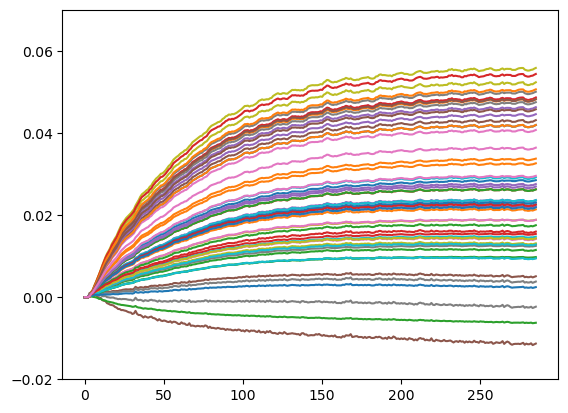

In [13]:
# Plot damage_fraction of shape (57, 286, 1001) where 57 regions, 286 time steps and 1001 scenarios. 

import matplotlib.pyplot as plt

# plt.ylim(10, 40)
# (ylim=(10, 40))
# Set ylimit to 0.07 to -0.02
mean_damage_fraction = np.mean(damage_fraction, axis=2)
plt.ylim(-0.02, 0.07)
# Mean of the damage fraction over all scenarios
plt.plot(mean_damage_fraction.T)

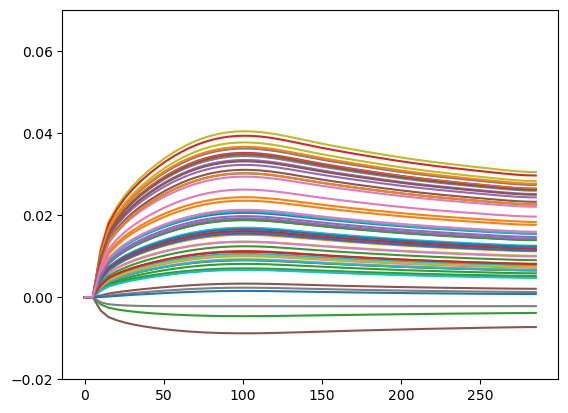

In [7]:
# Now plot the interpolated data

# Set the ylimit to 0.07 to -0.02
plt.ylim(-0.02, 0.07)
plt.plot(interpolated_data.T)

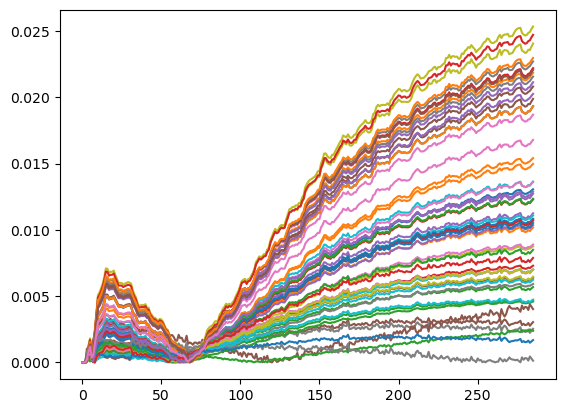

In [15]:
# Find the error between the two datasets
error = np.abs(interpolated_data - mean_damage_fraction)

# Plot the error
plt.plot(error.T)